In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(42)

In [2]:
# nomial model
model = hmm.GaussianHMM(n_components = 2, covariance_type = "full")
model.startprob_ = np.array([0.5, 0.5])
model.transmat_ = np.array([[0.3, 0.7],
                            [0.3, 0.7]])
model.means_ = np.array([[0.0], [5.0]])
model.covars_ = np.tile(np.identity(1), (2, 1, 1))

In [3]:
# generate the nomial dataset
# the nomial dataset is just the samples generated by the model
n_nomial = 100
X_temp, Z = model.sample(n_samples = 10, random_state = 13)
X_test_data_nomial = [X_temp]
# Generate samples
for i in range(n_nomial - 1):
    X_temp, Z = model.sample(n_samples = 10, random_state = i * 17)
    X_test_data_nomial = np.concatenate([X_test_data_nomial, [X_temp]])

In [4]:
# abnormal model
model_anomaly = hmm.GaussianHMM(n_components = 2, covariance_type = "full")
model_anomaly.startprob_ = np.array([0.5, 0.5])
model_anomaly.transmat_ = np.array([[0.5, 0.5],
                            [0.5, 0.5]])
model_anomaly.means_ = np.array([[-5.0], [0.0]])
model_anomaly.covars_ = np.tile(np.identity(1), (2, 1, 1))

In [5]:
# generate the abnormal dataset
# the anomaly dataset is the dataset generated by a slightly different model
anomaly_portion = 0.25
n_anomaly = int(anomaly_portion * n_nomial // 1)
X_temp, Z = model_anomaly.sample(n_samples = 10, random_state = 13)
X_test_data_anomaly = [X_temp]
# Generate samples
for i in range(n_anomaly - 1):
    X_temp, Z = model_anomaly.sample(n_samples = 10, random_state = i * 17)
    X_test_data_anomaly = np.concatenate([X_test_data_anomaly, [X_temp]])

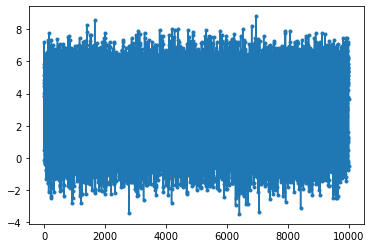

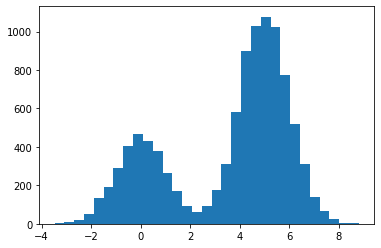

In [6]:
# graph the model-generated observations
# just for illustration, this block of code has no other use
X, Z = model.sample(n_samples = 10000, random_state = 13)
plt.plot(X[:], ".-")
plt.show()
_ = plt.hist(X, bins = 'auto')
plt.show()

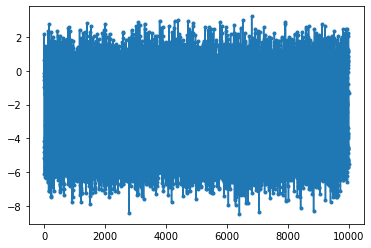

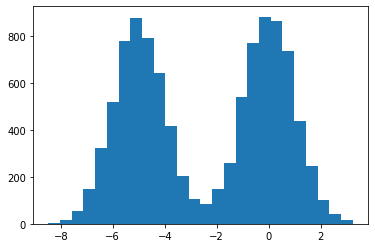

In [7]:
# graph the anomaly-model-generated observations
# just for illustration, this block of code has no other use
# also note that, the histogram shown here is not the histogram for each observation sequence
X, Z = model_anomaly.sample(n_samples = 10000, random_state = 13)
plt.plot(X[:], ".-")
plt.show()
_ = plt.hist(X, bins = 'auto')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

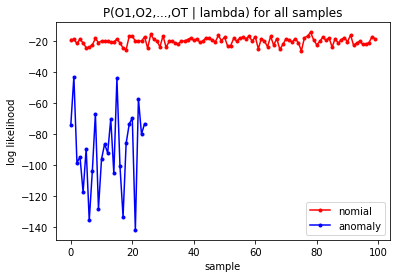

In [26]:
score_nomial = [model.score(X_test_data_nomial[0])]
# Plot the log likelihood for each sample sequence
for i in range(n_nomial - 1):
    score_nomial = np.concatenate([score_nomial, [model.score(X_test_data_nomial[i + 1])]])
plt.plot(score_nomial[:], ".-", label="nomial", color = 'r')

score_anomaly = [model.score(X_test_data_anomaly[0])]
for i in range(n_anomaly - 1):
    score_anomaly = np.concatenate([score_anomaly, [model.score(X_test_data_anomaly[i + 1])]])
plt.plot(score_anomaly[:], ".-", label="anomaly", color = 'b')   

plt.xlabel("sample")
plt.ylabel("log likelihood")
plt.title("P(O1,O2,...,OT | lambda) for all samples")
plt.legend()

plt.show

In [43]:
model_fit = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
model_fit.fit(X_test_data_nomial.reshape(-1,1), lengths = [len(X_test_data_nomial[i]) for i in range(np.size(X_test_data_nomial,0))])
print("\pi:")
print(model_fit.startprob_)
print("A:")
print(model_fit.transmat_)
print("\mu:")
print(model.means_)
print("\Sigma:")
print(model.covars_)

\pi:
[0.47912059 0.52087941]
A:
[[0.31741323 0.68258677]
 [0.30102698 0.69897302]]
\mu:
[[0.]
 [5.]]
\Sigma:
[[[1.]]

 [[1.]]]


<function matplotlib.pyplot.show(*args, **kw)>

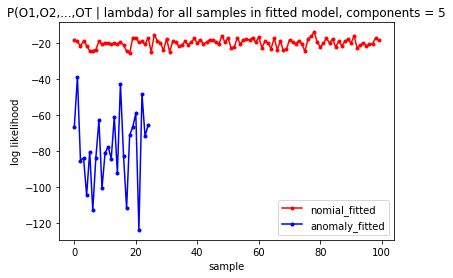

In [35]:
score_nomial_fit = [model_fit.score(X_test_data_nomial[0])]
# Plot the log likelihood for each sample sequence
for i in range(n_nomial - 1):
    score_nomial_fit = np.concatenate([score_nomial_fit, [model_fit.score(X_test_data_nomial[i + 1])]])
plt.plot(score_nomial_fit[:], ".-", label="nomial_fitted", color = 'r')

score_anomaly_fit = [model_fit.score(X_test_data_anomaly[0])]
for i in range(n_anomaly - 1):
    score_anomaly_fit = np.concatenate([score_anomaly_fit, [model_fit.score(X_test_data_anomaly[i + 1])]])
plt.plot(score_anomaly_fit[:], ".-", label="anomaly_fitted", color = 'b')   
plt.xlabel("sample")
plt.ylabel("log likelihood")
plt.title("P(O1,O2,...,OT | lambda) for all samples in fitted model, components = 5")
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

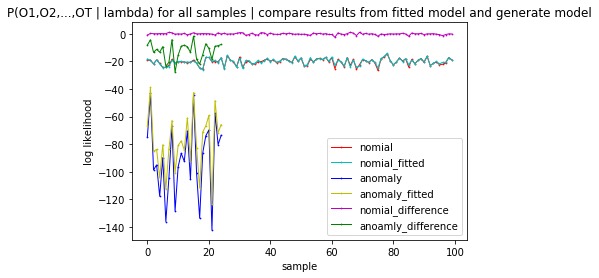

In [40]:
plt.plot(score_nomial[:], ".-", label="nomial", color = 'r', linewidth = 1, markersize = 1.5)
plt.plot(score_nomial_fit[:], ".-", label="nomial_fitted", color = 'c', linewidth = 1, markersize = 1.5)
plt.plot(score_anomaly[:], ".-", label="anomaly", color = 'b', linewidth = 1, markersize = 1.5)
plt.plot(score_anomaly_fit[:], ".-", label="anomaly_fitted", color = 'y', linewidth = 1, markersize = 1.5)
#plt.plot(score_nomial[:] - score_nomial_fit[:], ".-", label="nomial_difference", color = 'm', linewidth = 1, markersize = 1.5)
#plt.plot(score_anomaly[:] - score_anomaly_fit[:], ".-", label="anoamly_difference", color = 'g', linewidth = 1, markersize = 1.5)
plt.xlabel("sample")
plt.ylabel("log likelihood")
plt.title("P(O1,O2,...,OT | lambda) for all samples | compare results from fitted model and generate model")
plt.legend()
plt.show